<a href="https://colab.research.google.com/github/emanbuc/ultrasonic-vision/blob/main/notebooks/create_training_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preparazione dataset per training classificatore oggetti indipendente dalla posizione

Questo script arrichisce il dataset originale aggiungendo delle feature di tipo "categorical" derivate delle distanze stimate dai sensori.
Lo scopo è quello di addestrare un classificatore in grado di riconoscere il tipo di oggetto indipendentemente dal posizionamento dell'oggetto all'interno dell'area di rilevamento.


In [1]:
# Univariate Histograms
import matplotlib.pyplot as plt
import pandas
url = "https://raw.githubusercontent.com/emanbuc/ultrasonic-vision/main/dataset/20210102_alldata_outliers_removed.csv"

names = ['HCSR04_001', 'HCSR04_002', 'HCSR04_003', 'HCSR04_004', 'HCSR04_005', 'HCSR04_006', 'HCSR04_007','ObjectClass']
data = pandas.read_csv(url, usecols=names)
print(data)

     HCSR04_001  HCSR04_002  HCSR04_003  HCSR04_004  HCSR04_005  HCSR04_006  \
0         55.59       16.09       54.78       17.55       51.73       57.48   
1         56.40       16.06       55.29       17.48       51.27       57.42   
2         56.32       16.04       54.86       17.55       51.26       58.30   
3         55.08       15.96       54.87       17.62       51.24       58.28   
4         55.11       15.96       55.22       17.57       51.71       57.86   
..          ...         ...         ...         ...         ...         ...   
302       53.43       55.59       55.07       52.16       51.25       51.77   
303       53.40       55.57       55.13       52.10       51.71       52.60   
304       53.83       55.60       55.14       52.53       51.29       51.70   
305       53.40       55.97       55.08       52.22       51.17       51.74   
306       53.41       55.63       54.76       52.12       51.24       52.51   

     HCSR04_007  ObjectClass  
0         96.38  BAL

In [2]:
df_EMPTY=data[data['ObjectClass']=='EMPTY_SEVEN']
distanceColumns= ['HCSR04_001', 'HCSR04_002', 'HCSR04_003', 'HCSR04_004', 'HCSR04_005', 'HCSR04_006', 'HCSR04_007']
categorialColumns =['ObjectClass']

## Analisi delle features
I range dell feaute sono molto diversi a causa degli errori di stima. Per una analisi visiva è necessario prima rimuove gli outliers
Le sistanze dipendono sia dalla posiizone dell'oggetto che dal tipo di oggetto. 

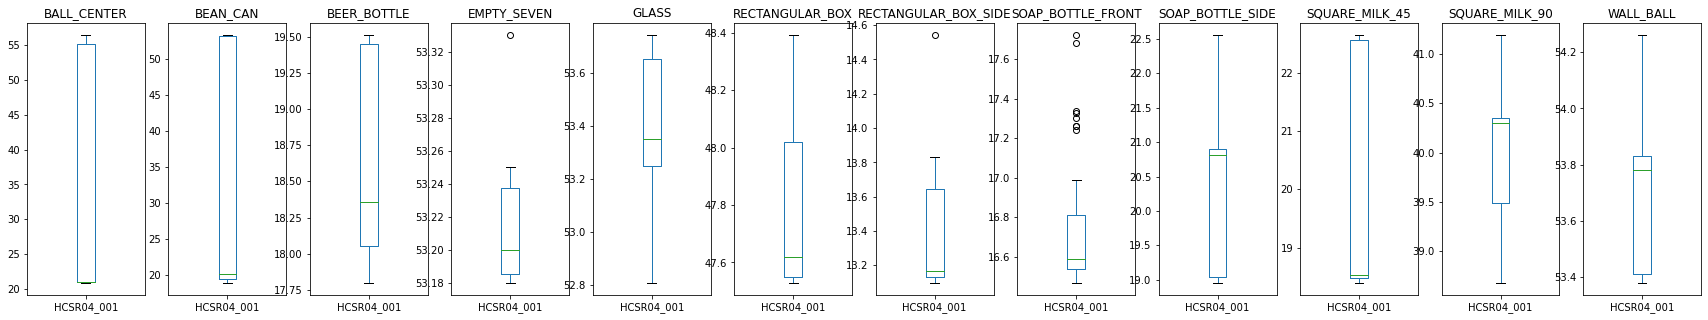

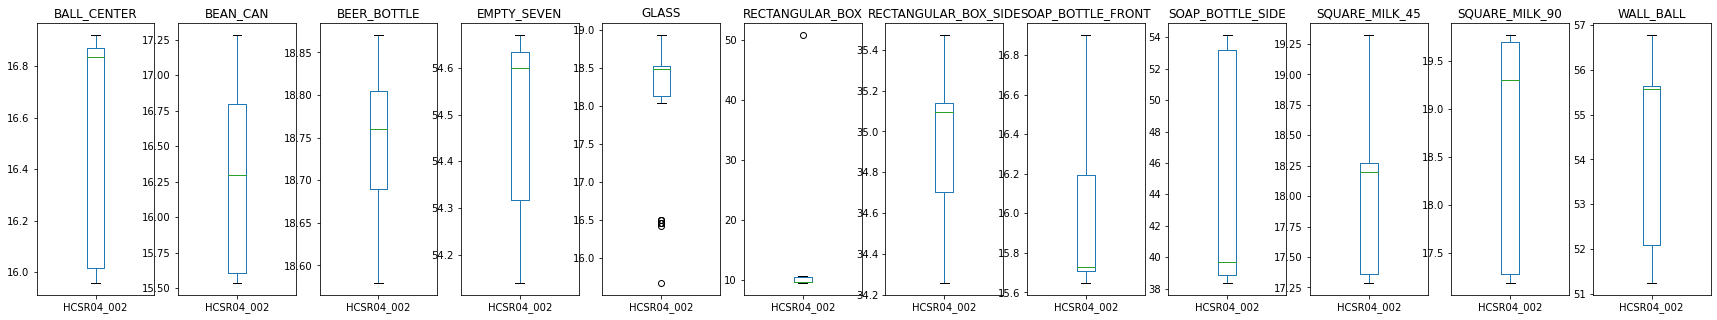

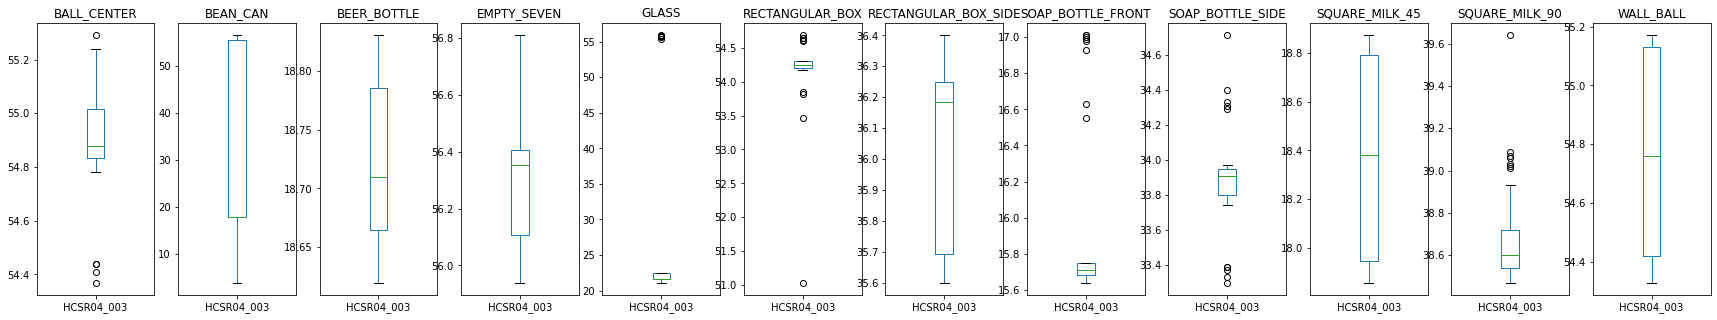

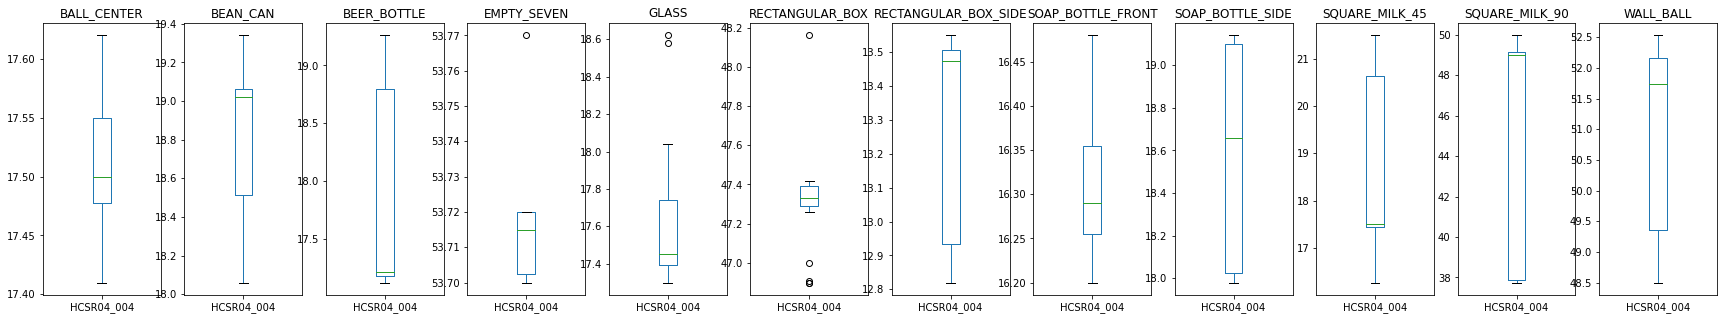

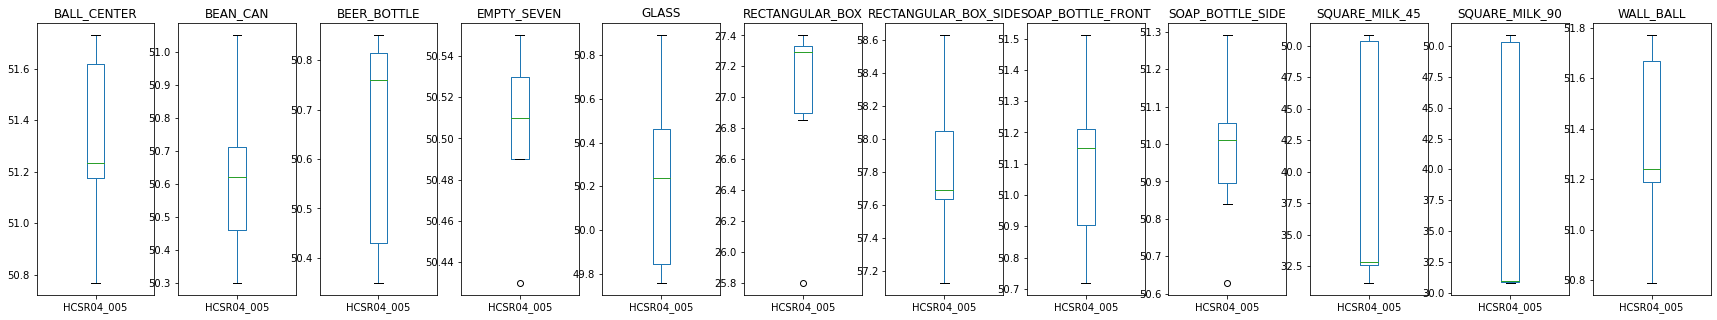

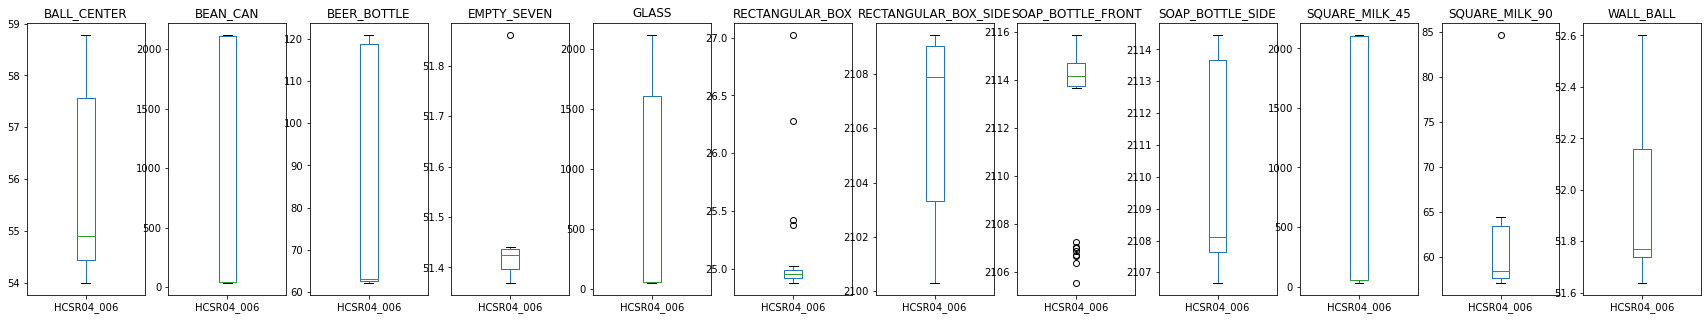

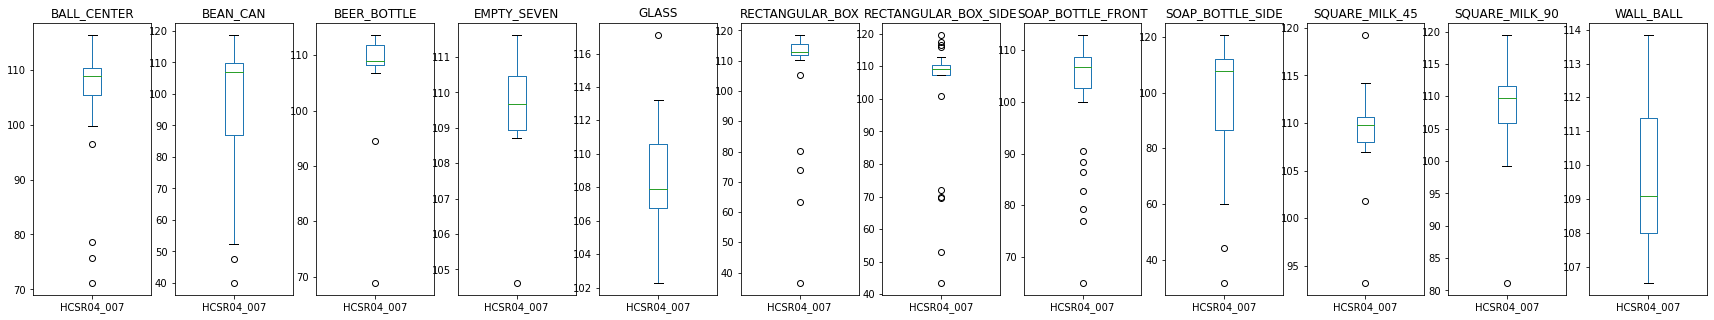

In [3]:
groupedByClass = data.groupby(['ObjectClass'])
for featureName in distanceColumns:
  fig, axes = plt.subplots(ncols=groupedByClass.ngroups, figsize=(30, 5))
  index=0  
  for name, group in groupedByClass:
    group[featureName].plot(kind='box', ax=axes[index], title=name)
    index=index+1


## New Features

Le distanze dipendono fortemente dalla posizione esatta dell'oggetto all'interno dell'area di misura. I modelli addestrati hanno problemi di overfitting e funzionano bene solo se gli oggetti vengono posizionati in maniera precisa. Aggiungo nuove feature derivate per cercare di ottenere una classificazione più robusta rispetto al posizionamento degli oggetti.

### Oggetto Rilevato

Boolean: True se il sensore rileva un bersaglio (), False se non viene rilevato un oggetto (lettura compatibile con EMPTY_SEVEN)

In [4]:
for colName in distanceColumns:
  maxValue= max(df_EMPTY[colName])
  minValue= min(df_EMPTY[colName])
  print(colName+ "min: "+str(minValue)+"max: "+str(maxValue))
  data[colName+'_empty']= (data[colName]<= maxValue) & (data[colName] >=minValue)
  categorialColumns.append(colName+'_empty')

data

HCSR04_001min: 53.18max: 53.33
HCSR04_002min: 54.14max: 54.67
HCSR04_003min: 55.94max: 56.81
HCSR04_004min: 53.7max: 53.77
HCSR04_005min: 50.43max: 50.55
HCSR04_006min: 51.37max: 51.86
HCSR04_007min: 104.63max: 111.61


,HCSR04_001,HCSR04_002,HCSR04_003,HCSR04_004,HCSR04_005,HCSR04_006,HCSR04_007,ObjectClass,HCSR04_001_empty,HCSR04_002_empty,HCSR04_003_empty,HCSR04_004_empty,HCSR04_005_empty,HCSR04_006_empty,HCSR04_007_empty
0,55.59,16.09,54.78,17.55,51.73,57.48,96.38,BALL_CENTER,False,False,False,False,False,False,False
1,56.40,16.06,55.29,17.48,51.27,57.42,109.68,BALL_CENTER,False,False,False,False,False,False,True
2,56.32,16.04,54.86,17.55,51.26,58.30,116.21,BALL_CENTER,False,False,False,False,False,False,False
3,55.08,15.96,54.87,17.62,51.24,58.28,78.56,BALL_CENTER,False,False,False,False,False,False,False
4,55.11,15.96,55.22,17.57,51.71,57.86,111.51,BALL_CENTER,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
302,53.43,55.59,55.07,52.16,51.25,51.77,109.41,WALL_BALL,False,False,False,False,False,True,True
303,53.40,55.57,55.13,52.10,51.71,52.60,107.89,WALL_BALL,False,False,False,False,False,False,True
304,53.83,55.60,55.14,52.53,51.29,51.70,111.39,WALL_BALL,False,False,False,False,False,True,True
305,53.40,55.97,55.08,52.22,51.17,51.74,109.09,WALL_BALL,False,False,False,False,False,True,True


## Binning

In [5]:
import numpy as np

binLabels=["NEAR","CENTER","FAR"]
binCuts=[-np.inf,20,40,np.inf]

for colName in distanceColumns:
  bins= pandas.cut(data[colName], bins=binCuts,labels=binLabels)
  data[colName+'_BIN']=bins
  categorialColumns.append(colName+'_BIN')

data[data['HCSR04_001'] < 20]
categorialColumns

['ObjectClass',
 'HCSR04_001_empty',
 'HCSR04_002_empty',
 'HCSR04_003_empty',
 'HCSR04_004_empty',
 'HCSR04_005_empty',
 'HCSR04_006_empty',
 'HCSR04_007_empty',
 'HCSR04_001_BIN',
 'HCSR04_002_BIN',
 'HCSR04_003_BIN',
 'HCSR04_004_BIN',
 'HCSR04_005_BIN',
 'HCSR04_006_BIN',
 'HCSR04_007_BIN']

In [6]:
data

,HCSR04_001,HCSR04_002,HCSR04_003,HCSR04_004,HCSR04_005,HCSR04_006,HCSR04_007,ObjectClass,HCSR04_001_empty,HCSR04_002_empty,...,HCSR04_005_empty,HCSR04_006_empty,HCSR04_007_empty,HCSR04_001_BIN,HCSR04_002_BIN,HCSR04_003_BIN,HCSR04_004_BIN,HCSR04_005_BIN,HCSR04_006_BIN,HCSR04_007_BIN
0,55.59,16.09,54.78,17.55,51.73,57.48,96.38,BALL_CENTER,False,False,...,False,False,False,FAR,NEAR,FAR,NEAR,FAR,FAR,FAR
1,56.40,16.06,55.29,17.48,51.27,57.42,109.68,BALL_CENTER,False,False,...,False,False,True,FAR,NEAR,FAR,NEAR,FAR,FAR,FAR
2,56.32,16.04,54.86,17.55,51.26,58.30,116.21,BALL_CENTER,False,False,...,False,False,False,FAR,NEAR,FAR,NEAR,FAR,FAR,FAR
3,55.08,15.96,54.87,17.62,51.24,58.28,78.56,BALL_CENTER,False,False,...,False,False,False,FAR,NEAR,FAR,NEAR,FAR,FAR,FAR
4,55.11,15.96,55.22,17.57,51.71,57.86,111.51,BALL_CENTER,False,False,...,False,False,True,FAR,NEAR,FAR,NEAR,FAR,FAR,FAR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
302,53.43,55.59,55.07,52.16,51.25,51.77,109.41,WALL_BALL,False,False,...,False,True,True,FAR,FAR,FAR,FAR,FAR,FAR,FAR
303,53.40,55.57,55.13,52.10,51.71,52.60,107.89,WALL_BALL,False,False,...,False,False,True,FAR,FAR,FAR,FAR,FAR,FAR,FAR
304,53.83,55.60,55.14,52.53,51.29,51.70,111.39,WALL_BALL,False,False,...,False,True,True,FAR,FAR,FAR,FAR,FAR,FAR,FAR
305,53.40,55.97,55.08,52.22,51.17,51.74,109.09,WALL_BALL,False,False,...,False,True,True,FAR,FAR,FAR,FAR,FAR,FAR,FAR


In [7]:
data.to_csv("../dataset/20210102_alldata_outliers_removed_additional_features.csv")